# Problem statement
A retail company “ABC Private Limited” wants to understand the customer purchase behaviour (specifically, purchase amount) against various products of different categories. They have shared purchase summary of various customers for selected high volume products from last month.
The data set also contains customer demographics (age, gender, marital status, city_type, stay_in_current_city), product details (product_id and product category) and Total purchase_amount from last month.

Now, they want to build a model to predict the purchase amount of customer against various products which will help them to create personalized offer for customers against different products.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', 50)
plt.rcParams['figure.figsize'] = [25,10]

In [3]:
train = pd.read_csv('train.csv')
train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [4]:
train.shape

(550068, 12)

In [5]:
test = pd.read_csv('test.csv')
test.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


In [6]:
test.shape

(233599, 11)

In [8]:
combined = pd.concat([train,test], ignore_index=True)

In [9]:
combined.shape

(783667, 12)

In [10]:
combined.corr()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
User_ID,1.000000,-0.023976,0.020276,0.004568,0.002291,0.002490,0.004716
Occupation,-0.023976,1.000000,0.023563,-0.008441,-0.000773,0.010450,0.020833
Marital_Status,0.020276,0.023563,1.000000,0.019579,0.017131,0.018471,-0.000463
Product_Category_1,0.004568,-0.008441,0.019579,1.000000,0.540426,0.228299,-0.343703
Product_Category_2,0.002291,-0.000773,0.017131,0.540426,1.000000,0.543578,-0.209918
Product_Category_3,0.002490,0.010450,0.018471,0.228299,0.543578,1.000000,-0.022006
Purchase,0.004716,0.020833,-0.000463,-0.343703,-0.209918,-0.022006,1.000000


In [12]:
# Describe

combined.describe(include='all')

# Popular Product ID: P00265242
# Frequency of buying is more for males
# Most buying is coming from 26-35 age bracket
# Most of the buyers are coming from city cat B
# On average people stay for 1 year in the current city
# Min. purchase if of 12 dollar & max is 23000 dollars

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,7.836670e+05,783667,783667,783667,783667.000000,783667,783667,783667.000000,783667.000000,537685.000000,237858.000000,550068.000000
unique,NaN,3677,2,7,NaN,3,5,NaN,NaN,NaN,NaN,NaN
top,NaN,P00265242,M,26-35,NaN,B,1,NaN,NaN,NaN,NaN,NaN
freq,NaN,2709,590031,313015,NaN,329739,276425,NaN,NaN,NaN,NaN,NaN
mean,1.003029e+06,NaN,NaN,NaN,8.079300,NaN,NaN,0.409777,5.366196,9.844506,12.668605,9263.968713
std,1.727267e+03,NaN,NaN,NaN,6.522206,NaN,NaN,0.491793,3.878160,5.089093,4.125510,5023.065394
min,1.000001e+06,NaN,NaN,NaN,0.000000,NaN,NaN,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001519e+06,NaN,NaN,NaN,2.000000,NaN,NaN,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003075e+06,NaN,NaN,NaN,7.000000,NaN,NaN,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,NaN,NaN,NaN,14.000000,NaN,NaN,1.000000,8.000000,15.000000,16.000000,12054.000000


In [14]:
# Univariate analysis

combined.select_dtypes(include = np.number).columns

Index(['User_ID', 'Occupation', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

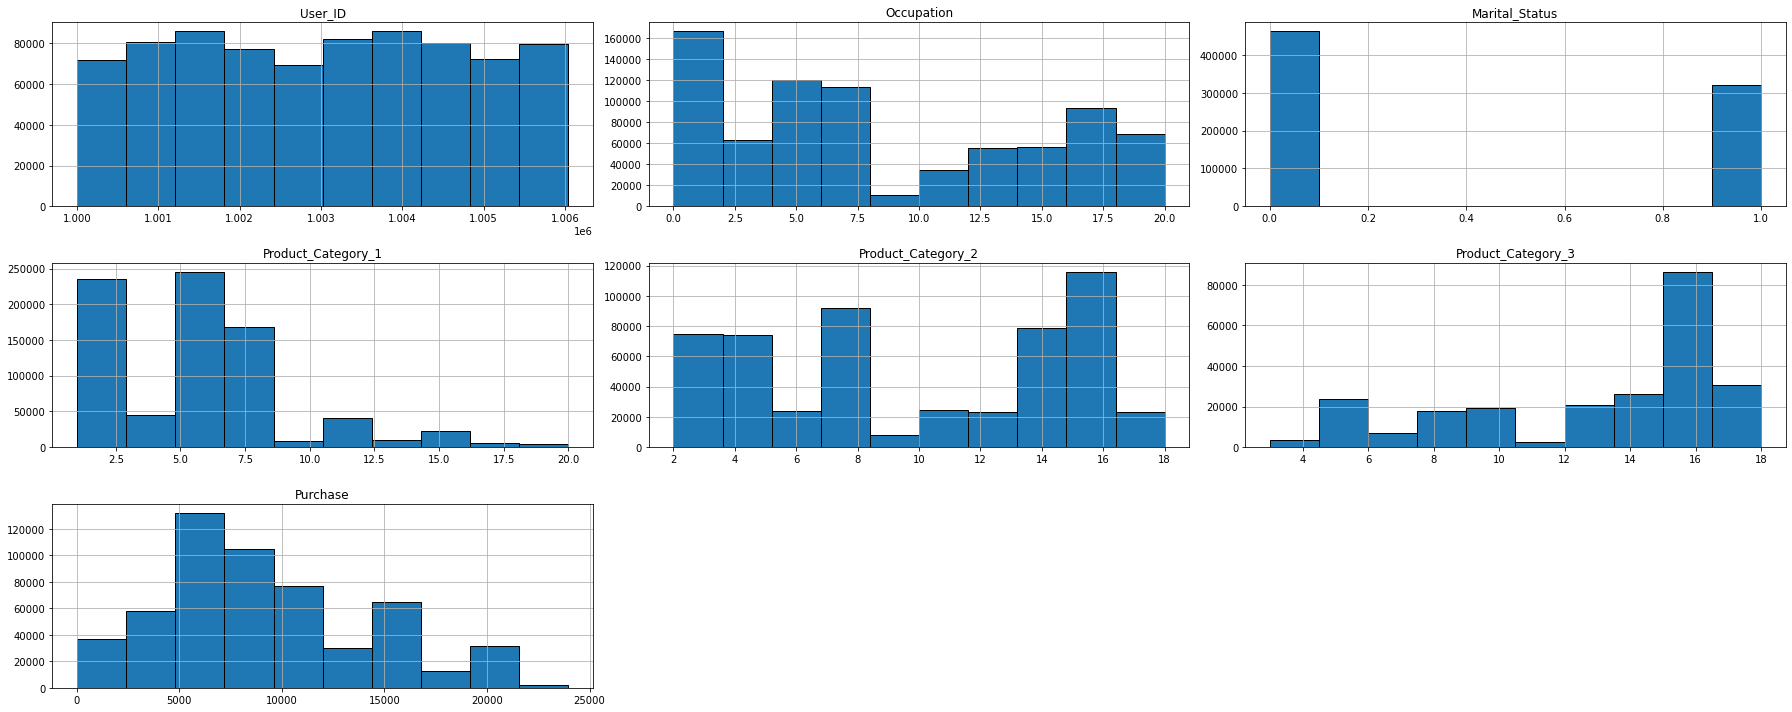

In [24]:
combined.hist(edgecolor = 'black')
plt.tight_layout()

In [15]:
#Cat

combined.select_dtypes(exclude = np.number).columns

Index(['Product_ID', 'Gender', 'Age', 'City_Category',
       'Stay_In_Current_City_Years'],
      dtype='object')

In [16]:
# Top 10 product ids
print(combined['Product_ID'].value_counts()[:5].index)

Index(['P00265242', 'P00025442', 'P00110742', 'P00112142', 'P00046742'], dtype='object')


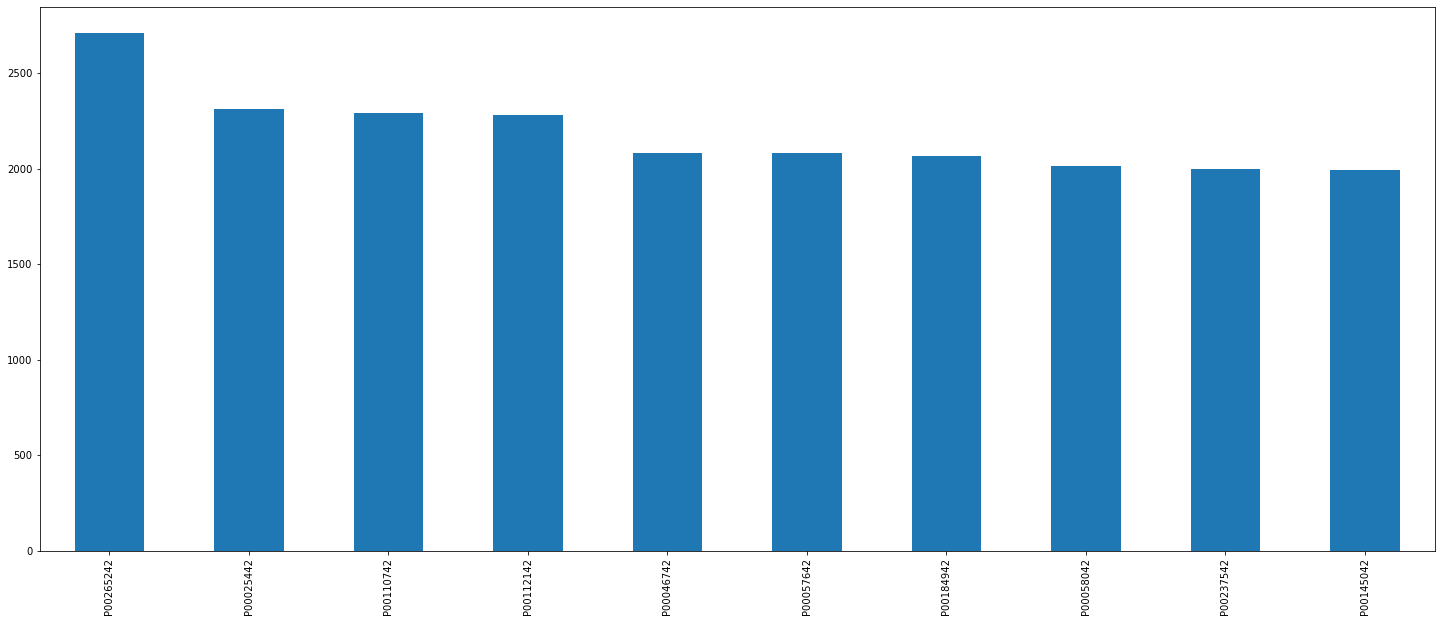

In [17]:
combined.Product_ID.value_counts()[:10].plot(kind='bar')
plt.show()

In [18]:
# Product category
prods = ['P00265242', 'P00025442', 'P00110742', 'P00112142', 'P00046742']

def prod_cat(x):
    if x in prods:
        return('Top5')
    else:
        return('Others')

combined['Product_Cat'] = combined.Product_ID.apply(prod_cat)

<AxesSubplot:xlabel='Product_Cat', ylabel='Purchase'>

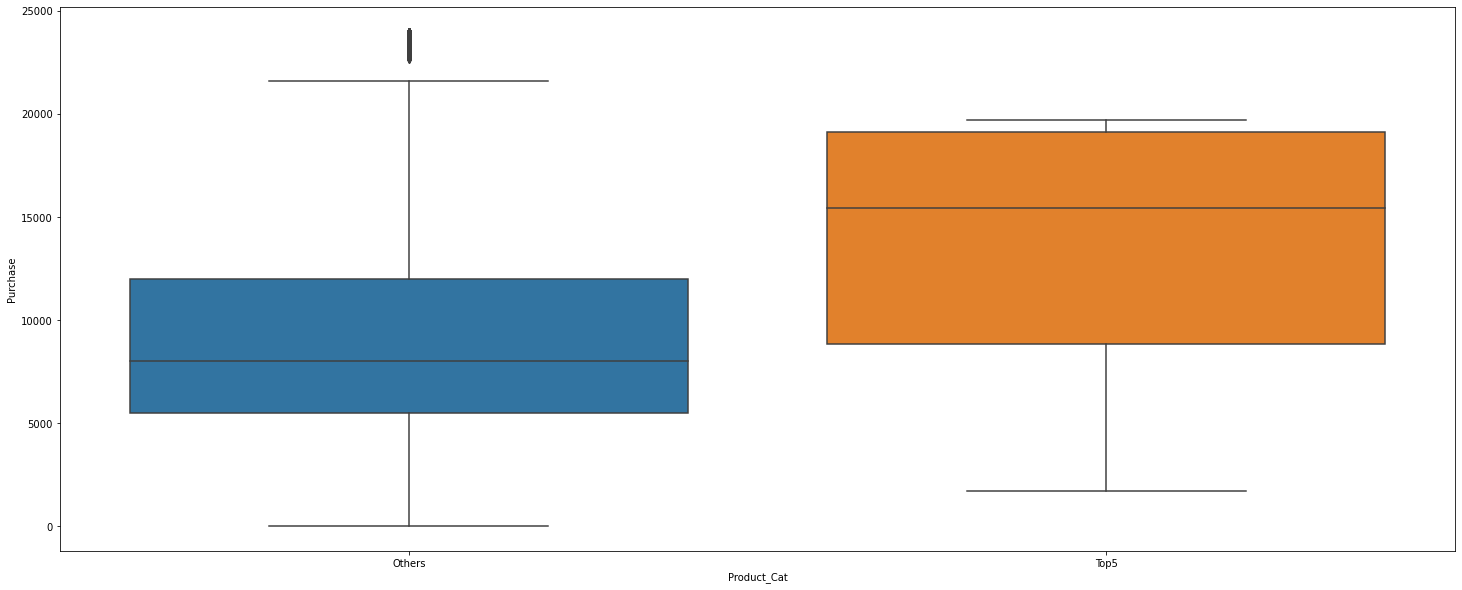

In [19]:
# Product category vs Target
sns.boxplot(combined['Product_Cat'],combined['Purchase'])

<AxesSubplot:>

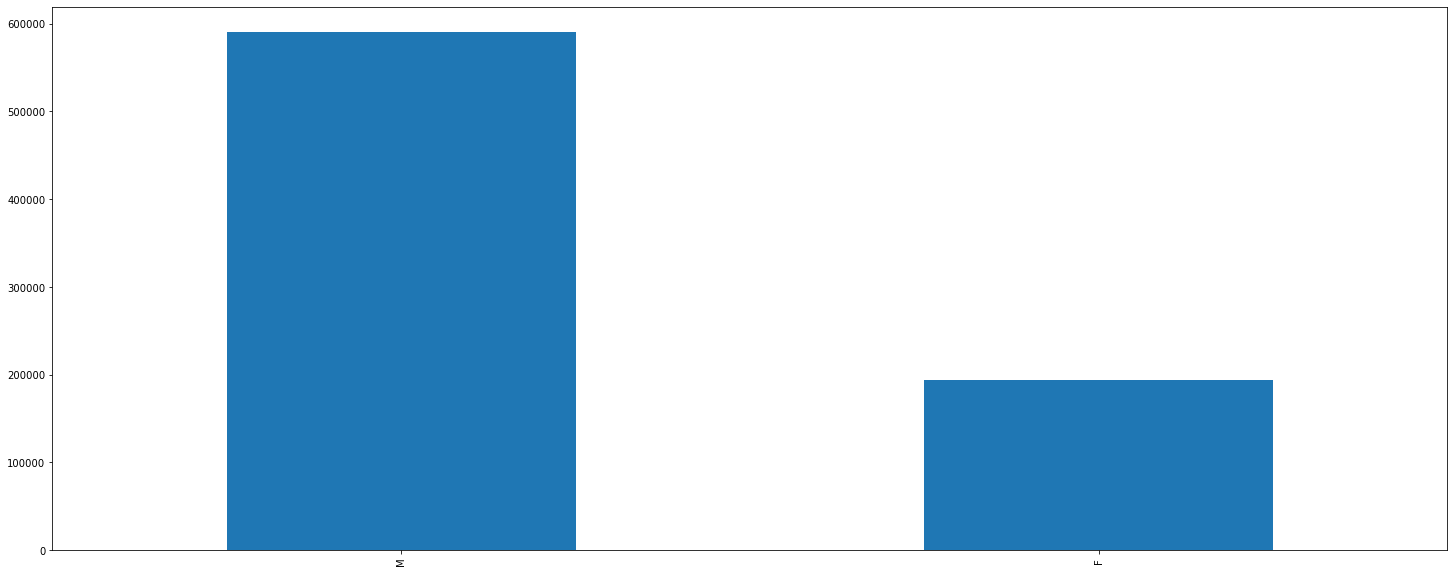

In [20]:
# Gender and age
combined.Gender.value_counts().plot(kind='bar')

26-35    313015
36-45    156724
18-25    141953
46-50     65278
51-55     54784
55+       30579
0-17      21334
Name: Age, dtype: int64


<AxesSubplot:xlabel='Age', ylabel='count'>

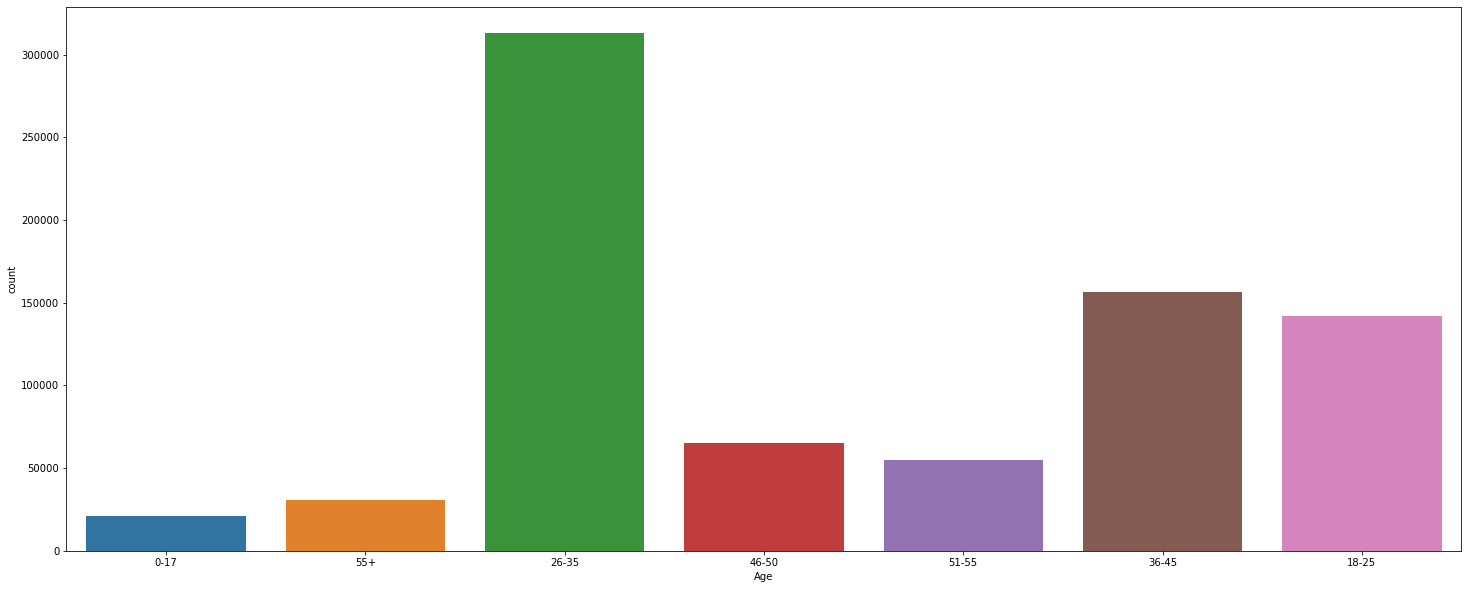

In [22]:
# Age

print(combined.Age.value_counts())
sns.countplot(combined.Age)

<AxesSubplot:xlabel='Age', ylabel='Purchase'>

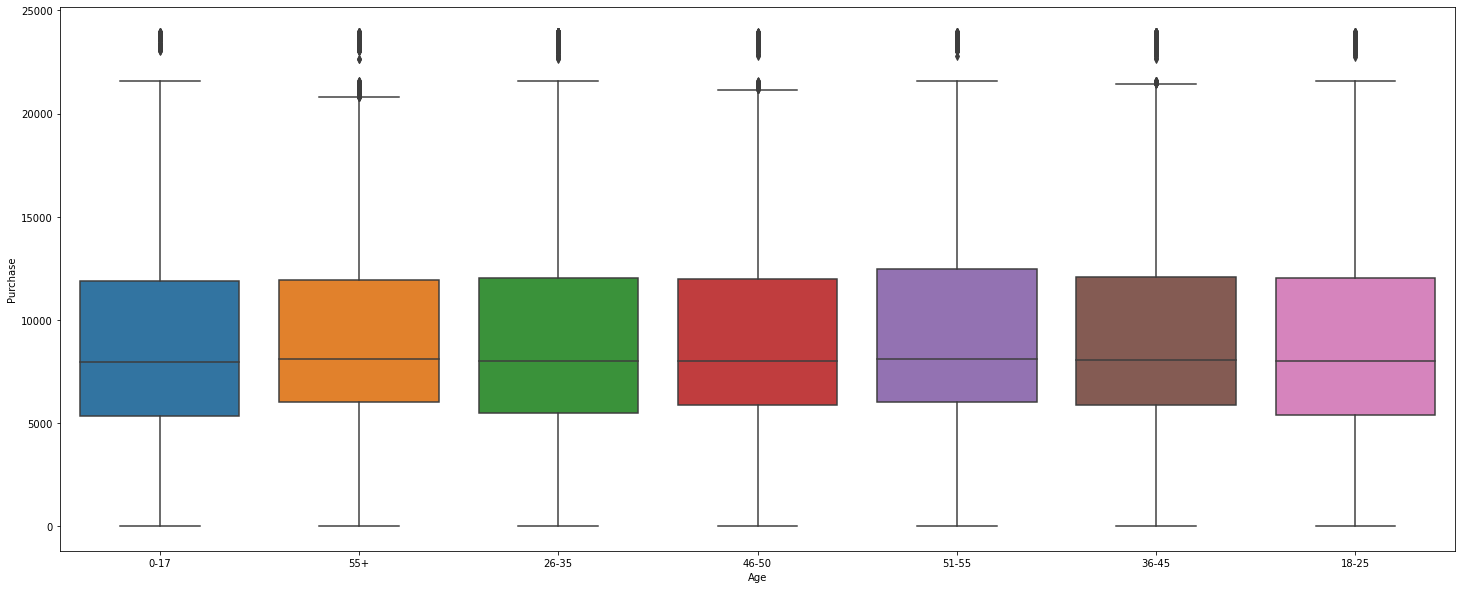

In [23]:
sns.boxplot(combined['Age'], combined['Purchase'])

In [25]:
combined['Age'].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [26]:
combined[['Age1','Age2']] = combined.Age.str.split('-',expand=True)

In [27]:
combined['Age1'] = combined.Age1.str.strip('+').astype('float')

In [30]:
combined.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Product_Cat,Age1,Age2
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0,Others,0.0,17
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0,Others,0.0,17
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0,Others,0.0,17
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0,Others,0.0,17
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0,Others,55.0,55


In [29]:
# Remove none

combined.loc[combined.Age2.isnull(), 'Age2'] = 55

In [31]:
combined.loc[combined.Age1 == 0,  'Age1'] = 17

In [32]:
combined['Avg_age'] = combined.loc[:, ['Age1','Age2']].mean(axis=1)

In [33]:
combined.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Product_Cat,Age1,Age2,Avg_age
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0,Others,17.0,17,17.0
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0,Others,17.0,17,17.0
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0,Others,17.0,17,17.0
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0,Others,17.0,17,17.0
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0,Others,55.0,55,55.0


In [34]:
combined.corr()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Age1,Avg_age
User_ID,1.000000,-0.023976,0.020276,0.004568,0.002291,0.002490,0.004716,0.032621,0.032621
Occupation,-0.023976,1.000000,0.023563,-0.008441,-0.000773,0.010450,0.020833,0.096361,0.096361
Marital_Status,0.020276,0.023563,1.000000,0.019579,0.017131,0.018471,-0.000463,0.309754,0.309754
Product_Category_1,0.004568,-0.008441,0.019579,1.000000,0.540426,0.228299,-0.343703,0.060405,0.060405
Product_Category_2,0.002291,-0.000773,0.017131,0.540426,1.000000,0.543578,-0.209918,0.053432,0.053432
Product_Category_3,0.002490,0.010450,0.018471,0.228299,0.543578,1.000000,-0.022006,0.054491,0.054491
Purchase,0.004716,0.020833,-0.000463,-0.343703,-0.209918,-0.022006,1.000000,0.014839,0.014839
Age1,0.032621,0.096361,0.309754,0.060405,0.053432,0.054491,0.014839,1.000000,1.000000
Avg_age,0.032621,0.096361,0.309754,0.060405,0.053432,0.054491,0.014839,1.000000,1.000000


In [35]:
combined.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Product_Cat,Age1,Age2,Avg_age
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0,Others,17.0,17,17.0
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0,Others,17.0,17,17.0
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0,Others,17.0,17,17.0
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0,Others,17.0,17,17.0
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0,Others,55.0,55,55.0


<AxesSubplot:xlabel='Stay_In_Current_City_Years', ylabel='Purchase'>

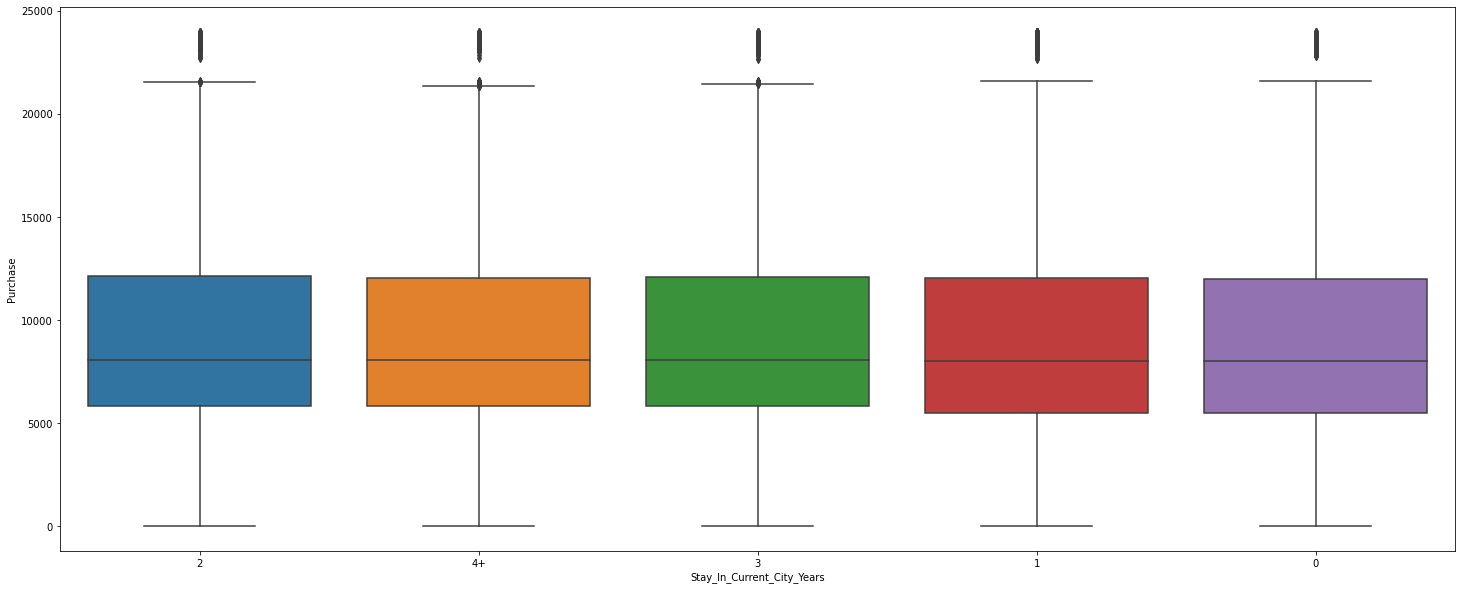

In [36]:
sns.boxplot(combined['Stay_In_Current_City_Years'],combined['Purchase'])

In [41]:
combined['Stay_In_Current_City_Years'] = combined.Stay_In_Current_City_Years.str.strip('+').astype('float')

In [42]:
combined.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Product_Cat,Age1,Age2,Avg_age
0,1000001,P00069042,F,0-17,10,A,2.0,0,3,NaN,NaN,8370.0,Others,17.0,17,17.0
1,1000001,P00248942,F,0-17,10,A,2.0,0,1,6.0,14.0,15200.0,Others,17.0,17,17.0
2,1000001,P00087842,F,0-17,10,A,2.0,0,12,NaN,NaN,1422.0,Others,17.0,17,17.0
3,1000001,P00085442,F,0-17,10,A,2.0,0,12,14.0,NaN,1057.0,Others,17.0,17,17.0
4,1000002,P00285442,M,55+,16,C,4.0,0,8,NaN,NaN,7969.0,Others,55.0,55,55.0


In [43]:
def prod_cat(x):
    if x in [5,8,1]:
        return('Top3')
    else:
        return('Others')

In [44]:
combined['Prod1'] = combined.Product_Category_1.apply(prod_cat)

In [45]:
combined.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Product_Cat,Age1,Age2,Avg_age,Prod1
0,1000001,P00069042,F,0-17,10,A,2.0,0,3,NaN,NaN,8370.0,Others,17.0,17,17.0,Others
1,1000001,P00248942,F,0-17,10,A,2.0,0,1,6.0,14.0,15200.0,Others,17.0,17,17.0,Top3
2,1000001,P00087842,F,0-17,10,A,2.0,0,12,NaN,NaN,1422.0,Others,17.0,17,17.0,Others
3,1000001,P00085442,F,0-17,10,A,2.0,0,12,14.0,NaN,1057.0,Others,17.0,17,17.0,Others
4,1000002,P00285442,M,55+,16,C,4.0,0,8,NaN,NaN,7969.0,Others,55.0,55,55.0,Top3


In [48]:
# City category

# Take the City cat and create the mean and median of purchase

combined['Mean_Tgt_city_wise'] = combined.groupby('City_Category')['Purchase'].transform('mean')

combined['Median_Tgt_city_wise'] = combined.groupby('City_Category')['Purchase'].transform('median')

combined['Std_Tgt_city_wise'] = combined.groupby('City_Category')['Purchase'].transform('std')

In [53]:
combined.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Product_Cat,Age1,Age2,Avg_age,Prod1,Mean_Tgt_city_wise,Median_Tgt_city_wise,Std_Tgt_city_wise,Prod_wise_User_count
0,1000001,P00069042,F,0-17,10,A,2.0,0,3,NaN,NaN,8370.0,Others,17.0,17,17.0,Others,8911.939216,7931.0,4892.115238,344
1,1000001,P00248942,F,0-17,10,A,2.0,0,1,6.0,14.0,15200.0,Others,17.0,17,17.0,Top3,8911.939216,7931.0,4892.115238,845
2,1000001,P00087842,F,0-17,10,A,2.0,0,12,NaN,NaN,1422.0,Others,17.0,17,17.0,Others,8911.939216,7931.0,4892.115238,150
3,1000001,P00085442,F,0-17,10,A,2.0,0,12,14.0,NaN,1057.0,Others,17.0,17,17.0,Others,8911.939216,7931.0,4892.115238,496
4,1000002,P00285442,M,55+,16,C,4.0,0,8,NaN,NaN,7969.0,Others,55.0,55,55.0,Top3,9719.920993,8585.0,5189.465121,283


In [51]:
# Count of Users basis products

combined['Prod_wise_User_count'] = combined.groupby('Product_ID')['User_ID'].transform('nunique')

In [52]:
combined.corr()

,User_ID,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Age1,Avg_age,Mean_Tgt_city_wise,Median_Tgt_city_wise,Std_Tgt_city_wise,Prod_wise_User_count
User_ID,1.000000,-0.023976,-0.030000,0.020276,0.004568,0.002291,0.002490,0.004716,0.032621,0.032621,0.015785,0.010401,0.013293,0.004468
Occupation,-0.023976,1.000000,0.028488,0.023563,-0.008441,-0.000773,0.010450,0.020833,0.096361,0.096361,0.036727,0.036149,0.036635,0.011603
Stay_In_Current_City_Years,-0.030000,0.028488,1.000000,-0.012871,-0.003518,-0.000994,0.000701,0.005422,-0.008269,-0.008269,0.016863,0.013177,0.015187,0.001934
Marital_Status,0.020276,0.023563,-0.012871,1.000000,0.019579,0.017131,0.018471,-0.000463,0.309754,0.309754,0.038985,0.036361,0.037928,-0.011130
Product_Category_1,0.004568,-0.008441,-0.003518,0.019579,1.000000,0.540426,0.228299,-0.343703,0.060405,0.060405,-0.016402,-0.014246,-0.015455,-0.232861
Product_Category_2,0.002291,-0.000773,-0.000994,0.017131,0.540426,1.000000,0.543578,-0.209918,0.053432,0.053432,-0.010589,-0.008975,-0.009869,-0.133294
Product_Category_3,0.002490,0.010450,0.000701,0.018471,0.228299,0.543578,1.000000,-0.022006,0.054491,0.054491,-0.001323,-0.001077,-0.001211,-0.060464
Purchase,0.004716,0.020833,0.005422,-0.000463,-0.343703,-0.209918,-0.022006,1.000000,0.014839,0.014839,0.063988,0.062708,0.063699,0.319679
Age1,0.032621,0.096361,-0.008269,0.309754,0.060405,0.053432,0.054491,0.014839,1.000000,1.000000,0.130025,0.121791,0.126747,-0.022485
Avg_age,0.032621,0.096361,-0.008269,0.309754,0.060405,0.053432,0.054491,0.014839,1.000000,1.000000,0.130025,0.121791,0.126747,-0.022485


In [54]:
combined['Prod_Cat1_user_count'] = combined.groupby(['Product_Category_1'])['User_ID'].transform('nunique')

In [55]:
# Purchase stats basis Product ID

combined['Mean_Tgt_Prod_ID'] = combined.groupby(['Product_ID'])['Purchase'].transform('mean')
combined['Median_Tgt_Prod_ID'] = combined.groupby(['Product_ID'])['Purchase'].transform('median')
combined['Min_Tgt_Prod_ID'] = combined.groupby(['Product_ID'])['Purchase'].transform('min')
combined['Max_Tgt_Prod_ID'] = combined.groupby(['Product_ID'])['Purchase'].transform('max')
combined['Std_Tgt_Prod_ID'] = combined.groupby(['Product_ID'])['Purchase'].transform('std')

In [56]:
combined.corr()

,User_ID,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Age1,Avg_age,Mean_Tgt_city_wise,Median_Tgt_city_wise,Std_Tgt_city_wise,Prod_wise_User_count,Prod_Cat1_user_count,Mean_Tgt_Prod_ID,Median_Tgt_Prod_ID,Min_Tgt_Prod_ID,Max_Tgt_Prod_ID,Std_Tgt_Prod_ID
User_ID,1.000000,-0.023976,-0.030000,0.020276,0.004568,0.002291,0.002490,0.004716,0.032621,0.032621,0.015785,0.010401,0.013293,0.004468,-0.004643,0.006088,0.005956,0.002325,0.000092,-0.006442
Occupation,-0.023976,1.000000,0.028488,0.023563,-0.008441,-0.000773,0.010450,0.020833,0.096361,0.096361,0.036727,0.036149,0.036635,0.011603,-0.004310,0.019854,0.019313,0.017985,0.019116,0.016758
Stay_In_Current_City_Years,-0.030000,0.028488,1.000000,-0.012871,-0.003518,-0.000994,0.000701,0.005422,-0.008269,-0.008269,0.016863,0.013177,0.015187,0.001934,0.002131,0.001146,0.001166,0.001352,0.003594,0.004391
Marital_Status,0.020276,0.023563,-0.012871,1.000000,0.019579,0.017131,0.018471,-0.000463,0.309754,0.309754,0.038985,0.036361,0.037928,-0.011130,-0.009130,0.003334,0.002429,0.004886,-0.007862,-0.016393
Product_Category_1,0.004568,-0.008441,-0.003518,0.019579,1.000000,0.540426,0.228299,-0.343703,0.060405,0.060405,-0.016402,-0.014246,-0.015455,-0.232861,-0.582848,-0.394862,-0.386475,-0.359263,-0.461568,-0.460197
Product_Category_2,0.002291,-0.000773,-0.000994,0.017131,0.540426,1.000000,0.543578,-0.209918,0.053432,0.053432,-0.010589,-0.008975,-0.009869,-0.133294,-0.052251,-0.250626,-0.251594,-0.255925,-0.297840,-0.301987
Product_Category_3,0.002490,0.010450,0.000701,0.018471,0.228299,0.543578,1.000000,-0.022006,0.054491,0.054491,-0.001323,-0.001077,-0.001211,-0.060464,0.160078,-0.028277,-0.041558,-0.029602,-0.035411,-0.028252
Purchase,0.004716,0.020833,0.005422,-0.000463,-0.343703,-0.209918,-0.022006,1.000000,0.014839,0.014839,0.063988,0.062708,0.063699,0.319679,0.028031,0.849659,0.839742,0.735215,0.797802,0.699741
Age1,0.032621,0.096361,-0.008269,0.309754,0.060405,0.053432,0.054491,0.014839,1.000000,1.000000,0.130025,0.121791,0.126747,-0.022485,-0.027207,0.012350,0.009868,0.011143,-0.020177,-0.048410
Avg_age,0.032621,0.096361,-0.008269,0.309754,0.060405,0.053432,0.054491,0.014839,1.000000,1.000000,0.130025,0.121791,0.126747,-0.022485,-0.027207,0.012350,0.009868,0.011143,-0.020177,-0.048410


In [57]:
combined.shape

(783667, 27)

In [58]:
combined['Mean_Tgt_User_ID'] = combined.groupby(['User_ID'])['Purchase'].transform('mean')
combined['Median_Tgt_User_ID'] = combined.groupby(['User_ID'])['Purchase'].transform('median')
combined['Min_Tgt_User_ID'] = combined.groupby(['User_ID'])['Purchase'].transform('min')
combined['Max_Tgt_User_ID'] = combined.groupby(['User_ID'])['Purchase'].transform('max')
combined['Std_Tgt_User_ID'] = combined.groupby(['User_ID'])['Purchase'].transform('std')

In [62]:
combined.corr()

,User_ID,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Age1,Avg_age,Mean_Tgt_city_wise,Median_Tgt_city_wise,Std_Tgt_city_wise,Prod_wise_User_count,Prod_Cat1_user_count,Mean_Tgt_Prod_ID,Median_Tgt_Prod_ID,Min_Tgt_Prod_ID,Max_Tgt_Prod_ID,Std_Tgt_Prod_ID,Mean_Tgt_User_ID,Median_Tgt_User_ID,Min_Tgt_User_ID,Max_Tgt_User_ID,Std_Tgt_User_ID,Prod_Age_Bins
User_ID,1.000000,-0.023976,-0.030000,0.020276,0.004568,0.002291,0.002490,0.004716,0.032621,0.032621,0.015785,0.010401,0.013293,0.004468,-0.004643,0.006088,0.005956,0.002325,0.000092,-0.006442,0.014107,0.020833,-0.011002,0.018201,0.035780,0.005111
Occupation,-0.023976,1.000000,0.028488,0.023563,-0.008441,-0.000773,0.010450,0.020833,0.096361,0.096361,0.036727,0.036149,0.036635,0.011603,-0.004310,0.019854,0.019313,0.017985,0.019116,0.016758,0.064003,0.053898,-0.012964,0.019097,0.051473,0.000539
Stay_In_Current_City_Years,-0.030000,0.028488,1.000000,-0.012871,-0.003518,-0.000994,0.000701,0.005422,-0.008269,-0.008269,0.016863,0.013177,0.015187,0.001934,0.002131,0.001146,0.001166,0.001352,0.003594,0.004391,0.017561,0.016503,0.018911,-0.013980,0.008029,0.001068
Marital_Status,0.020276,0.023563,-0.012871,1.000000,0.019579,0.017131,0.018471,-0.000463,0.309754,0.309754,0.038985,0.036361,0.037928,-0.011130,-0.009130,0.003334,0.002429,0.004886,-0.007862,-0.016393,-0.000847,0.011550,0.015130,0.030536,-0.019182,-0.005074
Product_Category_1,0.004568,-0.008441,-0.003518,0.019579,1.000000,0.540426,0.228299,-0.343703,0.060405,0.060405,-0.016402,-0.014246,-0.015455,-0.232861,-0.582848,-0.394862,-0.386475,-0.359263,-0.461568,-0.460197,-0.113473,-0.129816,-0.034221,0.043594,-0.015519,-0.094069
Product_Category_2,0.002291,-0.000773,-0.000994,0.017131,0.540426,1.000000,0.543578,-0.209918,0.053432,0.053432,-0.010589,-0.008975,-0.009869,-0.133294,-0.052251,-0.250626,-0.251594,-0.255925,-0.297840,-0.301987,-0.041100,-0.052731,-0.017086,0.038608,-0.002983,-0.028719
Product_Category_3,0.002490,0.010450,0.000701,0.018471,0.228299,0.543578,1.000000,-0.022006,0.054491,0.054491,-0.001323,-0.001077,-0.001211,-0.060464,0.160078,-0.028277,-0.041558,-0.029602,-0.035411,-0.028252,0.033844,0.025033,-0.012696,0.039088,0.035248,0.015765
Purchase,0.004716,0.020833,0.005422,-0.000463,-0.343703,-0.209918,-0.022006,1.000000,0.014839,0.014839,0.063988,0.062708,0.063699,0.319679,0.028031,0.849659,0.839742,0.735215,0.797802,0.699741,0.322415,0.296645,0.057013,0.059118,0.179935,0.105734
Age1,0.032621,0.096361,-0.008269,0.309754,0.060405,0.053432,0.054491,0.014839,1.000000,1.000000,0.130025,0.121791,0.126747,-0.022485,-0.027207,0.012350,0.009868,0.011143,-0.020177,-0.048410,0.046381,0.051524,0.007841,0.055318,-0.004581,0.006853
Avg_age,0.032621,0.096361,-0.008269,0.309754,0.060405,0.053432,0.054491,0.014839,1.000000,1.000000,0.130025,0.121791,0.126747,-0.022485,-0.027207,0.012350,0.009868,0.011143,-0.020177,-0.048410,0.046381,0.051524,0.007841,0.055318,-0.004581,0.006853


In [61]:
combined['Prod_Age_Bins'] = combined.groupby('Product_ID')['Age'].transform('nunique')

In [63]:
combined.shape

(783667, 33)

In [66]:
# Drop the vars

new = combined.drop(['User_ID', 'Product_ID', 'Age1', 'Age2', 'Product_Category_2', 'Product_Category_3' ],axis=1)

In [67]:
new.shape

(783667, 27)

In [69]:
#missing values

new.isnull().sum()[new.isnull().sum()>0]

Purchase              233599
Mean_Tgt_Prod_ID          61
Median_Tgt_Prod_ID        61
Min_Tgt_Prod_ID           61
Max_Tgt_Prod_ID           61
Std_Tgt_Prod_ID          272
dtype: int64

In [70]:
val = new.Min_Tgt_Prod_ID.median()
new.loc[new.Min_Tgt_Prod_ID.isnull(), 'Min_Tgt_Prod_ID'] = val

In [71]:
val1 = new.Mean_Tgt_Prod_ID.median()
new.loc[new.Mean_Tgt_Prod_ID.isnull(), 'Mean_Tgt_Prod_ID'] = val1

In [72]:
val2 = new.Median_Tgt_Prod_ID.median()
new.loc[new.Median_Tgt_Prod_ID.isnull(), 'Median_Tgt_Prod_ID'] = val2

In [73]:
val3 = new.Max_Tgt_Prod_ID.median()
new.loc[new.Max_Tgt_Prod_ID.isnull(), 'Max_Tgt_Prod_ID'] = val3

In [74]:
val4 = new.Std_Tgt_Prod_ID.median()
new.loc[new.Std_Tgt_Prod_ID.isnull(), 'Std_Tgt_Prod_ID'] = val4

In [75]:
new.isnull().sum()[new.isnull().sum()>0]

Purchase    233599
dtype: int64

<AxesSubplot:>

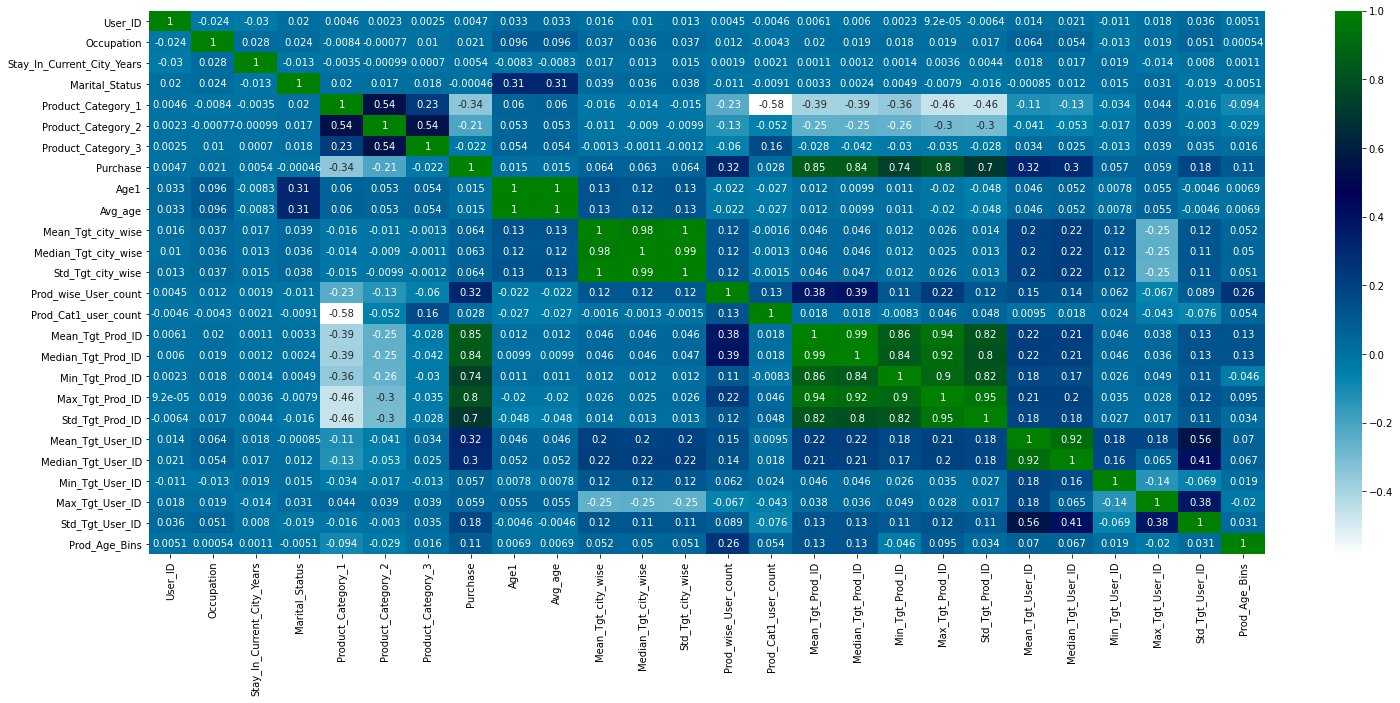

In [77]:
sns.heatmap(combined.corr(),annot= True, cmap='ocean_r')

In [78]:
# Split the data into train and test

newtrain = new.loc[0:train.shape[0]-1, :]
newtest = new.loc[train.shape[0]:, :]
newtrain.shape, newtest.shape

((550068, 27), (233599, 27))

In [79]:
# Drop purchase from newtest
newtest.drop('Purchase', axis=1, inplace=True)

In [80]:
newtrain.Age.unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [81]:
# drop the age from newtrain and newtest

newtrain.drop('Age', axis=1, inplace=True)
newtest.drop('Age',axis=1, inplace=True)

In [82]:
from sklearn.preprocessing import StandardScaler

X = newtrain.drop('Purchase', axis=1)
y = newtrain['Purchase'
            ]

In [84]:
X.select_dtypes(include = np.number).columns


Index(['Occupation', 'Stay_In_Current_City_Years', 'Marital_Status',
       'Product_Category_1', 'Avg_age', 'Mean_Tgt_city_wise',
       'Median_Tgt_city_wise', 'Std_Tgt_city_wise', 'Prod_wise_User_count',
       'Prod_Cat1_user_count', 'Mean_Tgt_Prod_ID', 'Median_Tgt_Prod_ID',
       'Min_Tgt_Prod_ID', 'Max_Tgt_Prod_ID', 'Std_Tgt_Prod_ID',
       'Mean_Tgt_User_ID', 'Median_Tgt_User_ID', 'Min_Tgt_User_ID',
       'Max_Tgt_User_ID', 'Std_Tgt_User_ID', 'Prod_Age_Bins'],
      dtype='object')

In [87]:
num_cols = ['Avg_age', 'Mean_Tgt_city_wise',
       'Median_Tgt_city_wise', 'Std_Tgt_city_wise', 'Prod_wise_User_count',
       'Prod_Cat1_user_count', 'Mean_Tgt_Prod_ID', 'Median_Tgt_Prod_ID',
       'Min_Tgt_Prod_ID', 'Max_Tgt_Prod_ID', 'Std_Tgt_Prod_ID',
       'Mean_Tgt_User_ID', 'Median_Tgt_User_ID', 'Min_Tgt_User_ID',
       'Max_Tgt_User_ID', 'Std_Tgt_User_ID']

In [88]:
len(num_cols)

16

In [91]:
sc = StandardScaler()

for i in num_cols:
    X.loc[:, i]= sc.fit_transform(pd.DataFrame(X.loc[:, i]))
    newtest.loc[:, i] = sc.transform(pd.DataFrame(newtest.loc[:, i]))

In [92]:
# One hot encoding

dummytrain = pd.get_dummies(X, drop_first=True)
dummytest = pd.get_dummies(newtest, drop_first=True)

In [94]:
dummytest.shape, dummytrain.shape

((233599, 26), (550068, 26))

In [95]:
X.columns

Index(['Gender', 'Occupation', 'City_Category', 'Stay_In_Current_City_Years',
       'Marital_Status', 'Product_Category_1', 'Product_Cat', 'Avg_age',
       'Prod1', 'Mean_Tgt_city_wise', 'Median_Tgt_city_wise',
       'Std_Tgt_city_wise', 'Prod_wise_User_count', 'Prod_Cat1_user_count',
       'Mean_Tgt_Prod_ID', 'Median_Tgt_Prod_ID', 'Min_Tgt_Prod_ID',
       'Max_Tgt_Prod_ID', 'Std_Tgt_Prod_ID', 'Mean_Tgt_User_ID',
       'Median_Tgt_User_ID', 'Min_Tgt_User_ID', 'Max_Tgt_User_ID',
       'Std_Tgt_User_ID', 'Prod_Age_Bins'],
      dtype='object')

In [96]:
X.shape

(550068, 25)

In [97]:
newtest.shape

(233599, 25)

# Modelling

In [100]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor, BaggingRegressor, ExtraTreesRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor



In [101]:
kfold = KFold(n_splits=5, shuffle=True, random_state=69)

lr = LinearRegression()

pred = []

for train_index, test_index in kfold.split(dummytrain, y):
    xtrain = dummytrain.iloc[train_index]
    xtest = dummytrain.iloc[test_index]
    ytrain = y.iloc[train_index]
    ytest = y.iloc[test_index]
    pred.append(lr.fit(xtrain, ytrain).predict(dummytest))
    
finalpred = pd.DataFrame(pred).T.mean(axis=1)

sub = pd.DataFrame({'Purchase': finalpred,
                    'User_ID': test.User_ID,
                    'Product_ID':test.Product_ID})
sub.to_csv('LinearRegression.csv')

In [102]:
dt = DecisionTreeRegressor()

pred = []

for train_index, test_index in kfold.split(dummytrain, y):
    xtrain = dummytrain.iloc[train_index]
    xtest = dummytrain.iloc[test_index]
    ytrain = y.iloc[train_index]
    ytest = y.iloc[test_index]
    pred.append(dt.fit(xtrain, ytrain).predict(dummytest))
    
finalpred = pd.DataFrame(pred).T.mean(axis=1)

sub = pd.DataFrame({'Purchase': finalpred,
                    'User_ID': test.User_ID,
                    'Product_ID':test.Product_ID})
sub.to_csv('DecisionTree.csv')

In [103]:
rf = RandomForestRegressor()
pred = []

for train_index, test_index in kfold.split(dummytrain, y):
    xtrain = dummytrain.iloc[train_index]
    xtest = dummytrain.iloc[test_index]
    ytrain = y.iloc[train_index]
    ytest = y.iloc[test_index]
    pred.append(rf.fit(xtrain, ytrain).predict(dummytest))
    
finalpred = pd.DataFrame(pred).T.mean(axis=1)

sub = pd.DataFrame({'Purchase': finalpred,
                    'User_ID': test.User_ID,
                    'Product_ID':test.Product_ID})
sub.to_csv('RandomForest.csv')

KeyboardInterrupt: 

In [105]:
xgb = XGBRegressor()
pred = []

for train_index, test_index in kfold.split(dummytrain, y):
    xtrain = dummytrain.iloc[train_index]
    xtest = dummytrain.iloc[test_index]
    ytrain = y.iloc[train_index]
    ytest = y.iloc[test_index]
    pred.append(xgb.fit(xtrain, ytrain).predict(dummytest))
    
finalpred = pd.DataFrame(pred).T.mean(axis=1)

sub = pd.DataFrame({'Purchase': finalpred,
                    'User_ID': test.User_ID,
                    'Product_ID':test.Product_ID})
sub.to_csv('XGB.csv')

In [107]:
xgb = XGBRegressor(max_depth=6, n_estimators = 40)
pred = []

for train_index, test_index in kfold.split(dummytrain, y):
    xtrain = dummytrain.iloc[train_index]
    xtest = dummytrain.iloc[test_index]
    ytrain = y.iloc[train_index]
    ytest = y.iloc[test_index]
    pred.append(xgb.fit(xtrain, ytrain).predict(dummytest))
    
finalpred = pd.DataFrame(pred).T.mean(axis=1)

sub = pd.DataFrame({'Purchase': finalpred,
                    'User_ID': test.User_ID,
                    'Product_ID':test.Product_ID})
sub.to_csv('XGB-tuned.csv')